In [4]:
from netCDF4 import Dataset
from netCDFfunc.utility import get_data_sequence, get_data_A, get_data_by_date, save_img, show_img

import numpy as np
import matplotlib.pyplot as plt

In [5]:
base_dir = '/Volumes/T7/AVHRR_OI_SST/v2.1/'

# raw value

In [5]:
for year in range(1982, 2021):
    value = get_data_sequence(base_dir = base_dir,
                              get_data_func = get_data_A,
                              var_name = 'sst',
                              start_date = (year,1,1),
                              end_date = (year,12,31))
    distribution = value.flatten()
    np.place(distribution, distribution == -999, np.nan)
    min_value = np.nanmin(distribution)
    max_value = np.nanmax(distribution)
    plt.hist(distribution, bins=100)
    plt.savefig(f'/Volumes/T7/intermediate output/all_data_distribution/{year}_min=({min_value:.2f})&max=({max_value:.2f}).jpg', dpi=100)
    plt.close()

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

# avg

In [ ]:
value = get_data_by_date(base_dir = base_dir,
                 get_data_func = get_data_A,
                 var_name = 'sst',
                 start_date = (1981,9,1),
                 end_date = (2011,8,31),
                        specific_date = (1,1))

  0%|          | 0/30 [00:00<?, ?it/s]

In [53]:
mean_dist = np.mean(value[(1,1)], axis=0).flatten()
np.place(mean_dist, mean_dist == -999, np.nan)
min_value = np.nanmin(mean_dist)
max_value = np.nanmax(mean_dist)
plt.hist(mean_dist, bins=100)
plt.savefig(f'/Volumes/T7/intermediate output/all_data_distribution/0_avg_1981_2011_0101_min=({min_value:.2f})&max=({max_value:.2f}).jpg', dpi=100)
plt.close()

# std

In [21]:
value = get_data_by_date(base_dir = base_dir,
                 get_data_func = get_data_A,
                 var_name = 'sst',
                 start_date = (1981,9,1),
                 end_date = (2011,8,31),
                        specific_date = (1,1))

  0%|          | 0/31 [00:00<?, ?it/s]

In [22]:
raw_value = np.array(value[(1,1)])

In [23]:
np.place(raw_value, raw_value==-999, np.nan)

In [24]:
std = np.std(raw_value, axis=0)

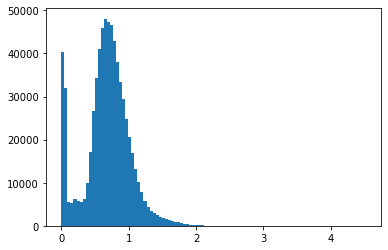

In [71]:
plt.hist(std.flatten(), bins=100)
plt.savefig(f'/Volumes/T7/intermediate output/data_distribution/1_std_dist_no_masking_\
mean=({np.nanmean(std):.2f})&min=({np.nanmin(std):.2f})&max=({np.nanmax(std):.2f}).jpg', dpi=100)
plt.show()
plt.close()

In [74]:
np.nanmean(std)

0.67781913

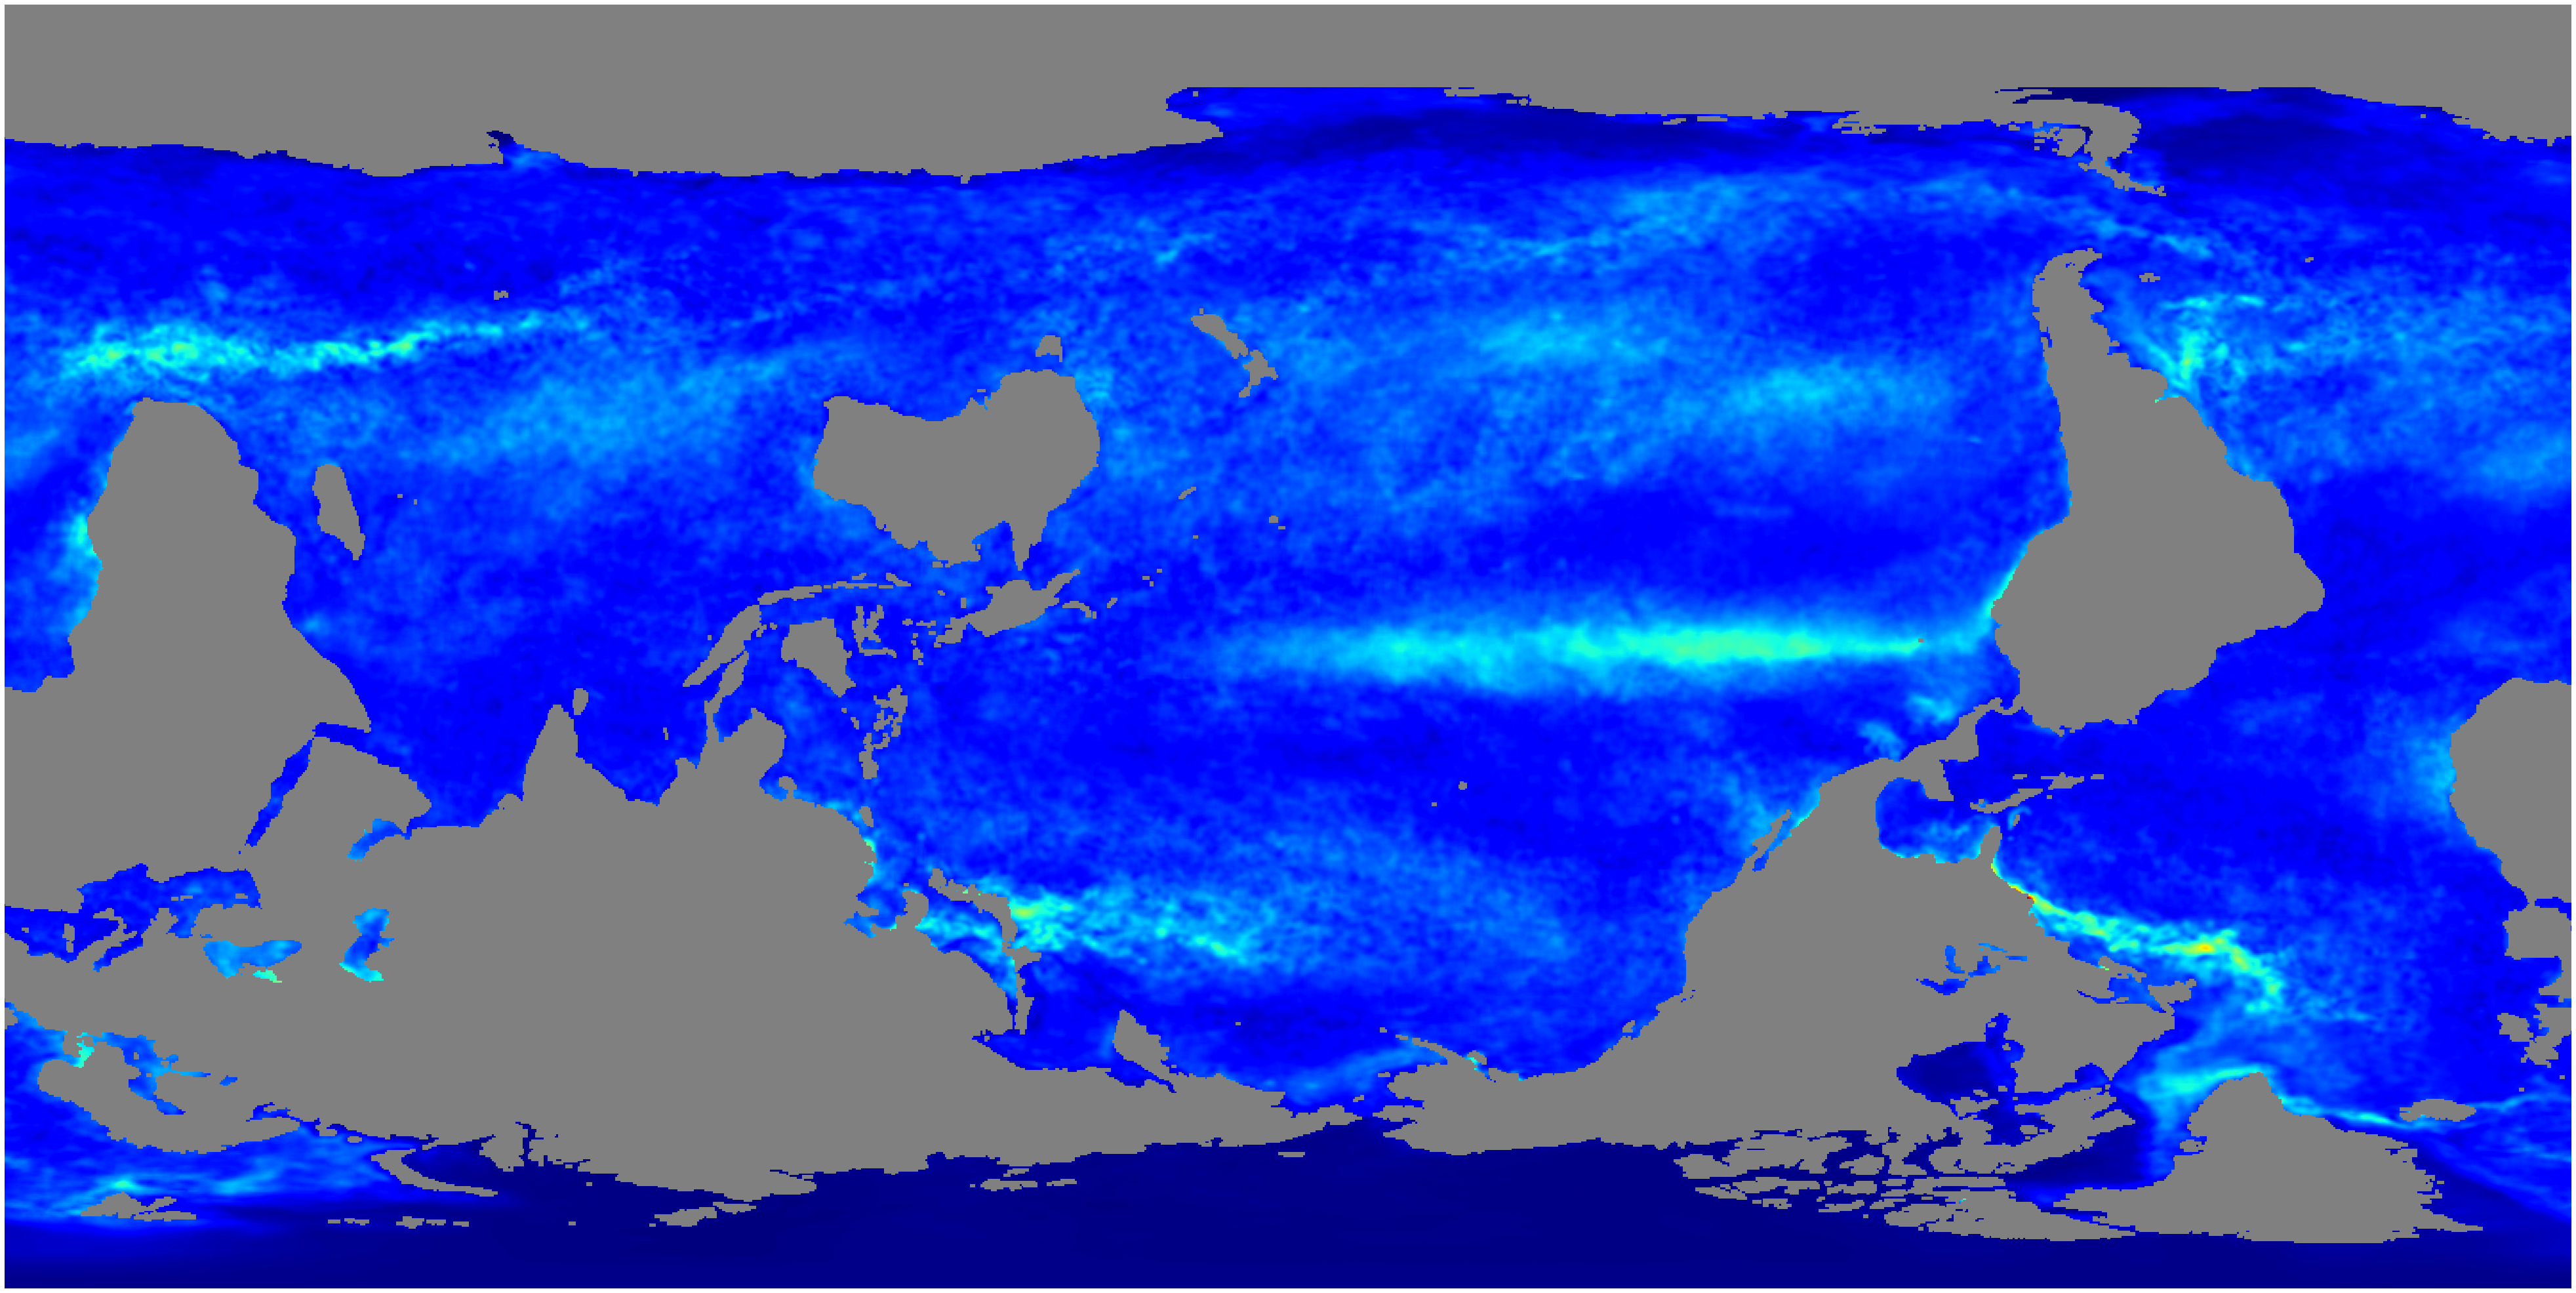

In [84]:
show_img(std)

# ice_mask

In [12]:
value = get_data_by_date(base_dir=base_dir,
                 get_data_func=get_data_A,
                 var_name='ice',
                 start_date=(1981,9,1),
                 end_date=(2011,8,31),
                 specific_date=(1,1),
                 is_mask=True)

  0%|          | 0/31 [00:00<?, ?it/s]

In [13]:
ice_mask_list = value[(1,1)]

In [55]:
ice_mask_list[0]

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [17]:
np.invert(ice_mask_list[0])

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [61]:
def masking(input_arr, mask_list):
    for mask in mask_list :
        input_arr = np.ma.array(input_arr, mask = np.invert(mask))
        input_arr = input_arr.filled(fill_value = np.nan)
    return input_arr

In [58]:
masking_arr = np.ma.array(std, mask=np.invert(ice_mask_list[0]))

In [60]:
masking_arr.filled(fill_value= np.nan)

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)

In [63]:
masking_arr = ice_masking(std, ice_mask_list)

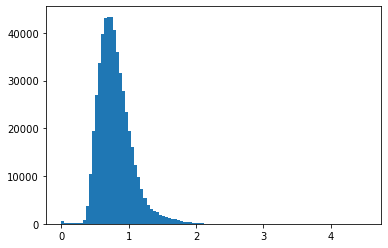

In [72]:
plt.hist(masking_arr.flatten(), bins=100)
plt.savefig(f'/Volumes/T7/intermediate output/data_distribution/1_std_dist_ice_masking_\
mean=({np.nanmean(masking_arr):.2f})&min=({np.nanmin(masking_arr):.2f})&max=({np.nanmax(masking_arr):.2f}).jpg', dpi=100)
plt.show()
plt.close()

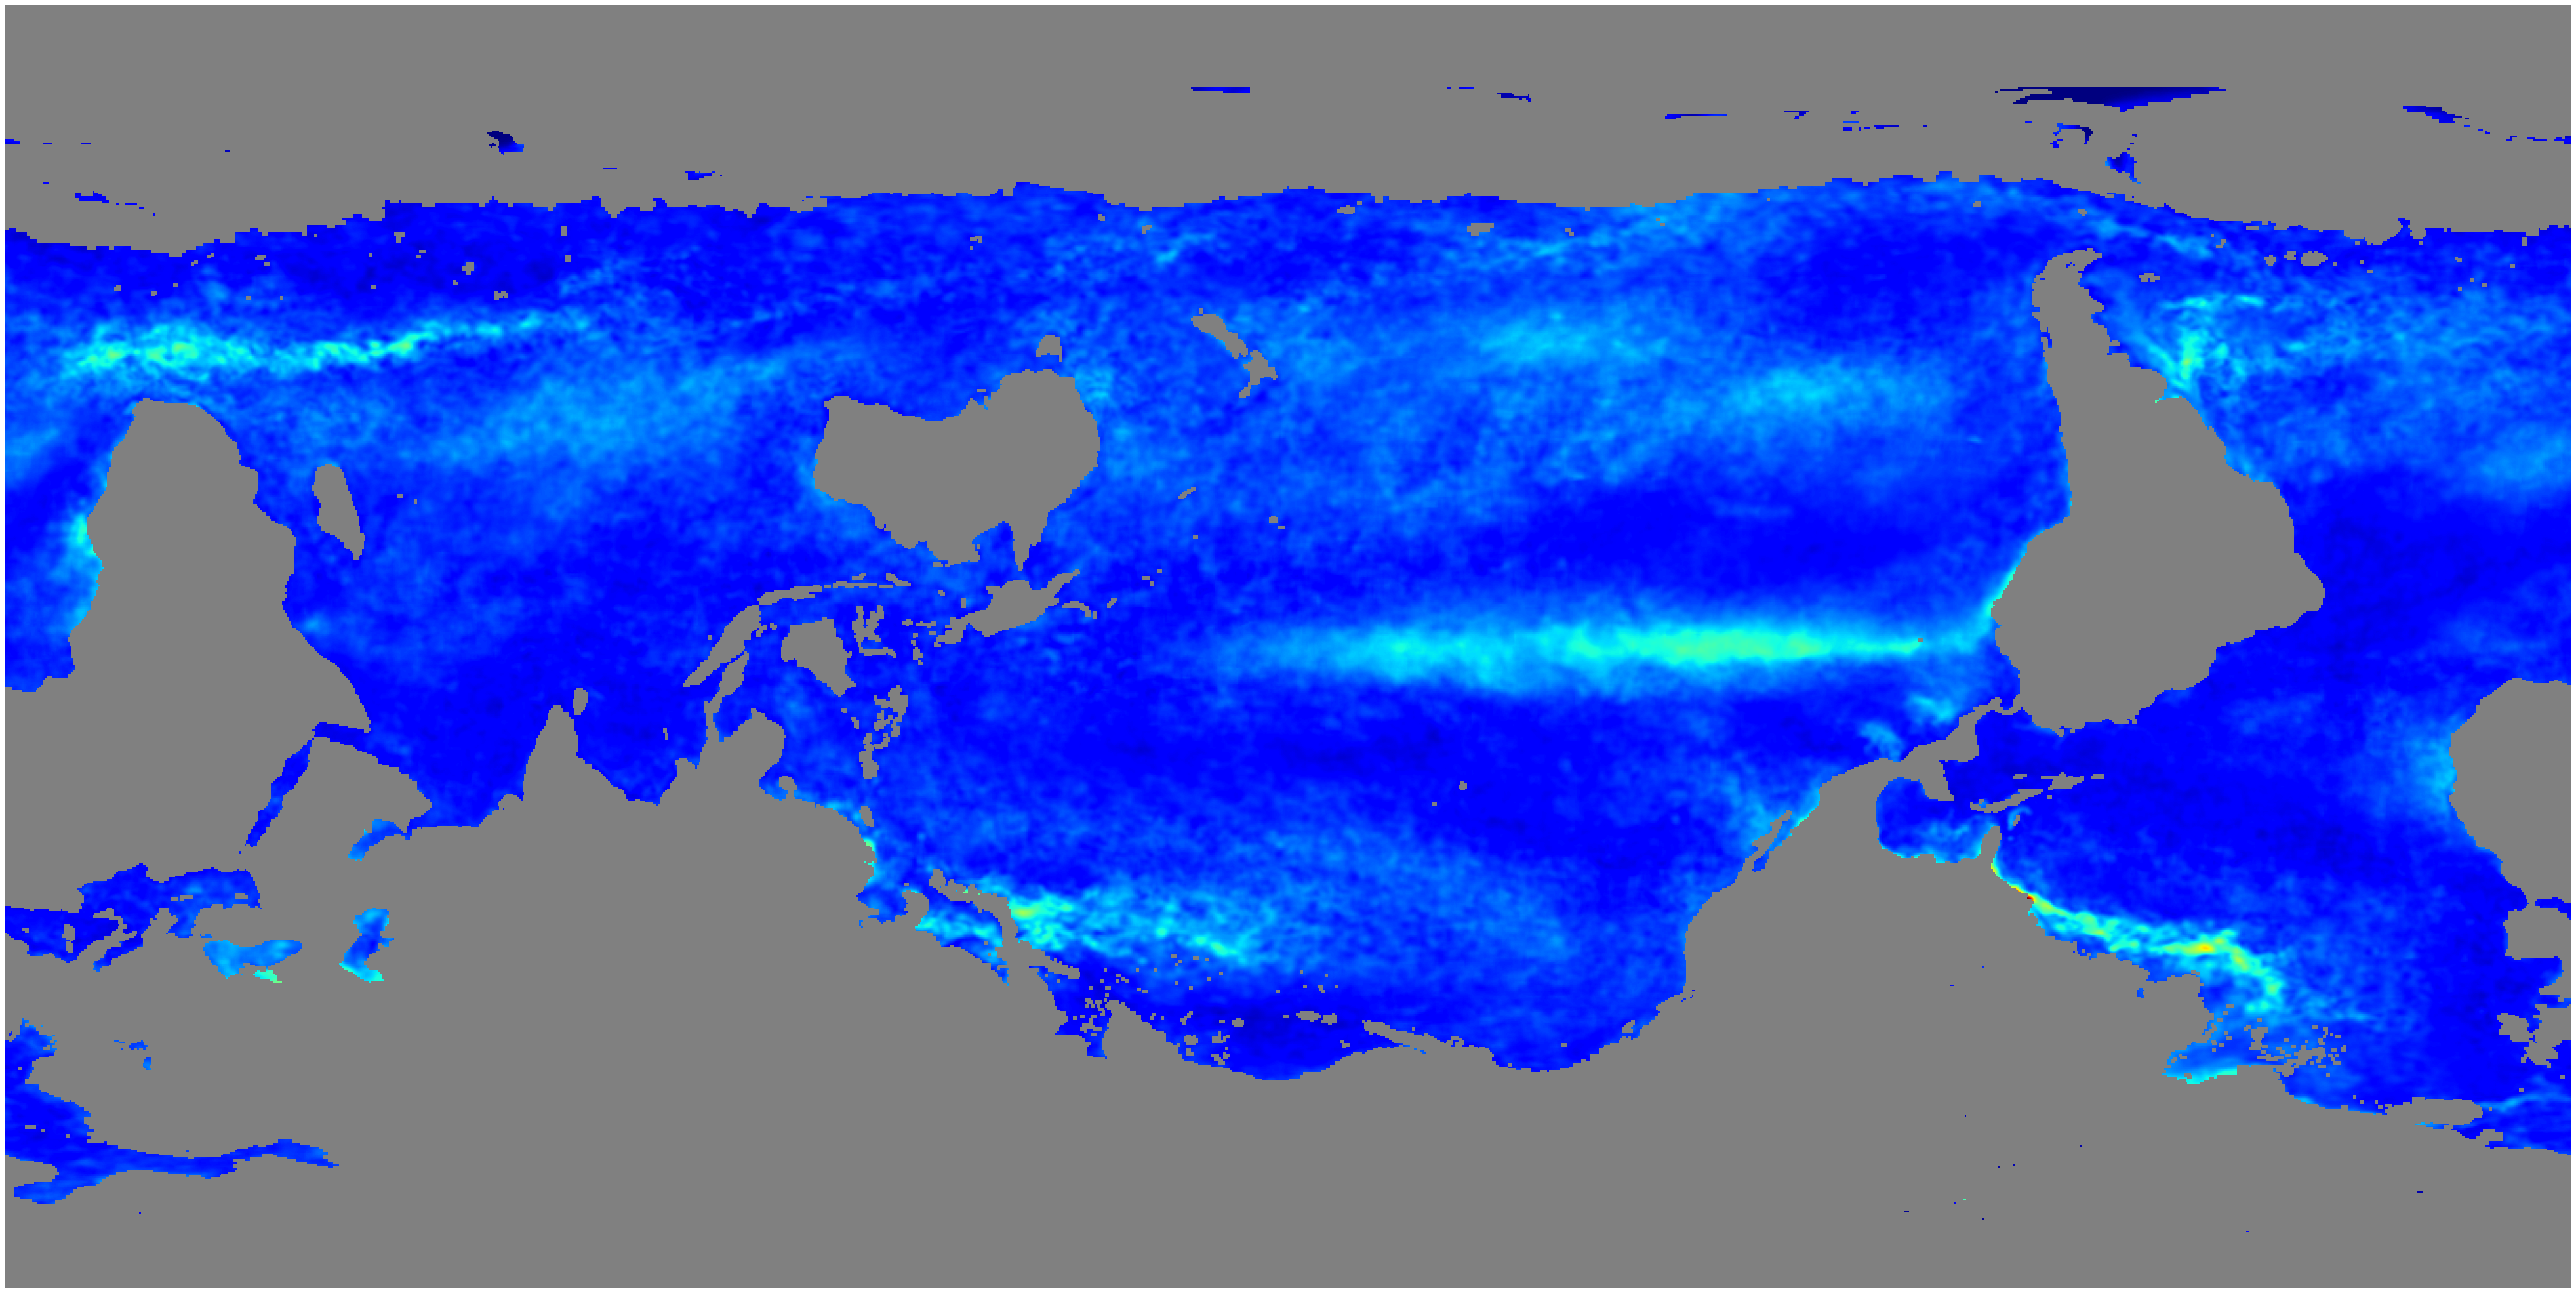

In [65]:
show_img(masking_arr)